In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Wholesale customers data.csv")

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
data.shape

(440, 8)

In [7]:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


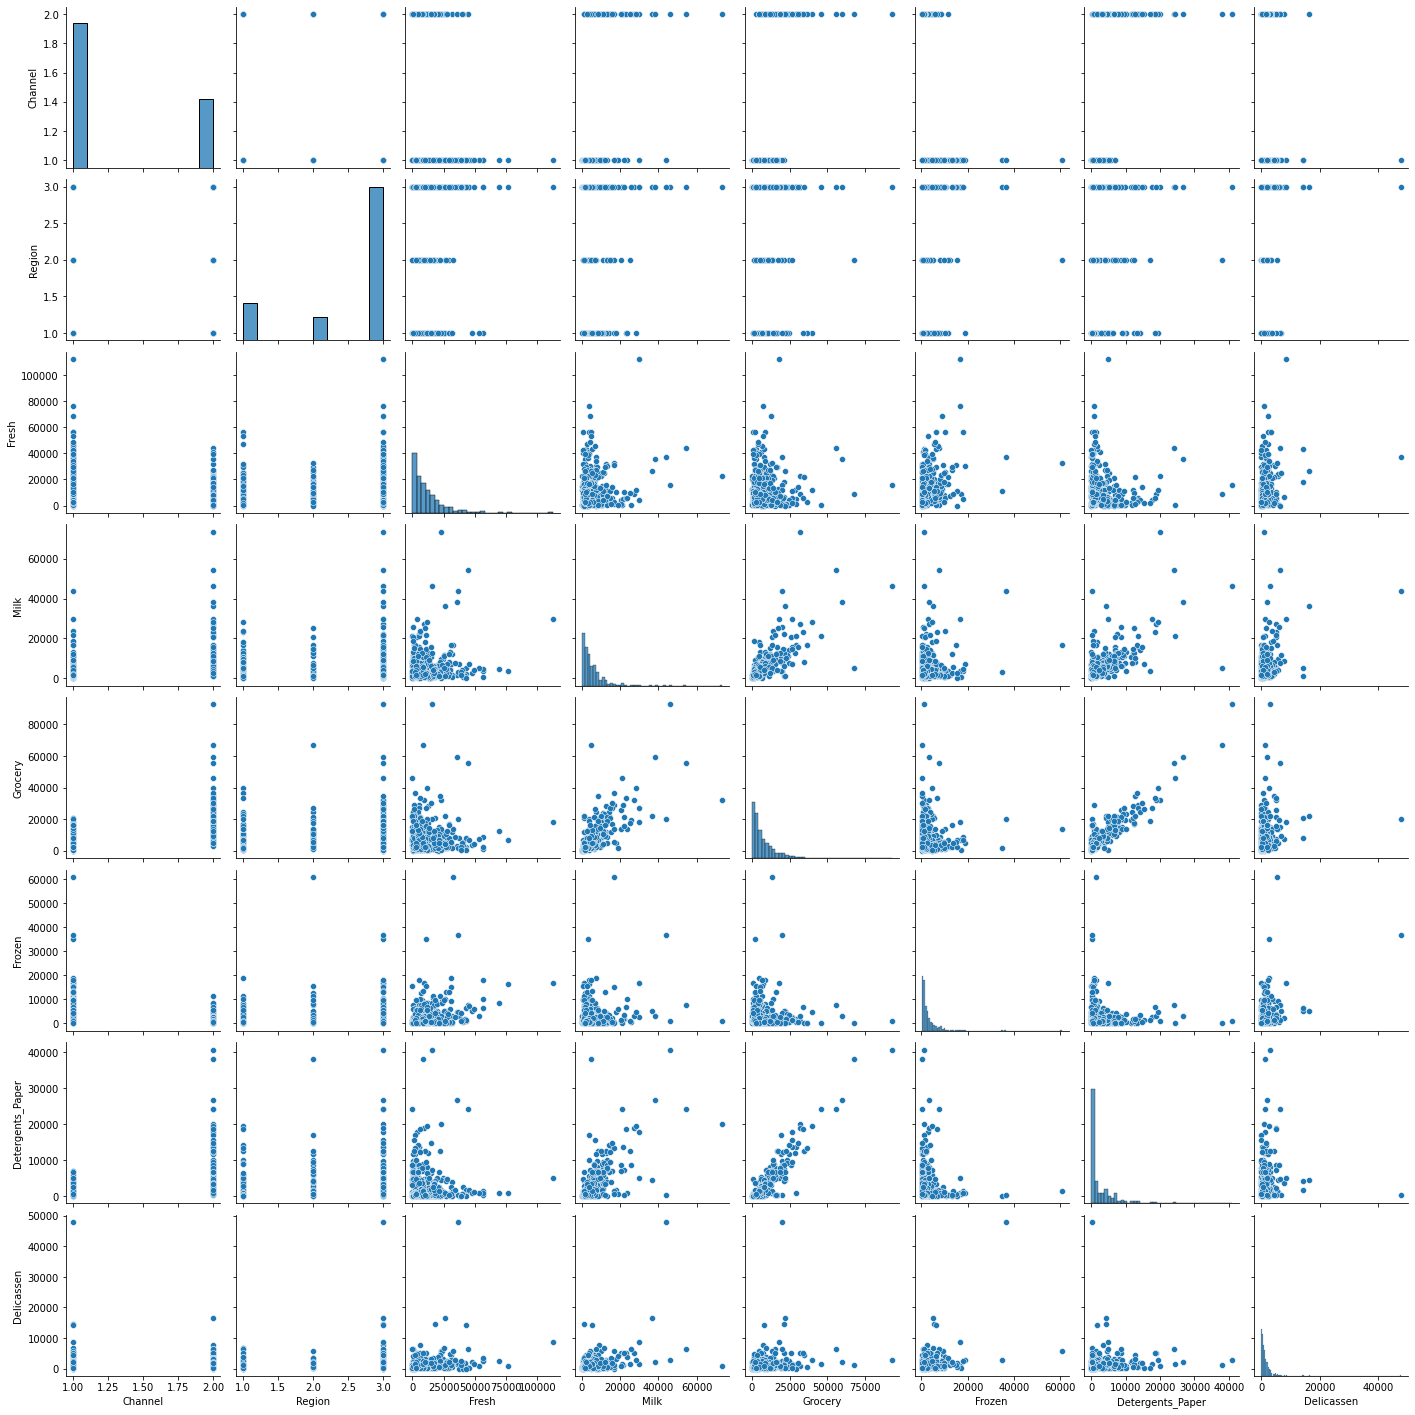

In [9]:
sns.pairplot(data)

In [11]:
file = data.drop(["Channel","Region"],axis=1)

In [13]:
file.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
file_scaled = scaler.fit_transform(file)
file_scaled = pd.DataFrame(file_scaled)
file_scaled.head()


,0,1,2,3,4,5
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [25]:
#kmeans Clustering 

from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
  kmeans = KMeans(n_clusters = i,init = "k-means++",random_state = 42)
  kmeans.fit(file_scaled)
  wcss.append(kmeans.inertia_)


1058.7712532570085


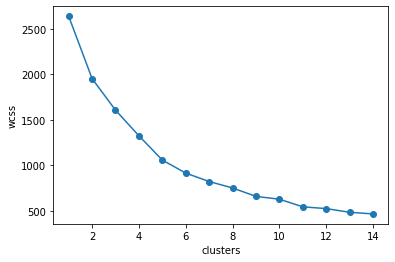

In [40]:
print(kmeans.inertia_)
plt.plot(range(1,15),wcss,'-o')
plt.xlabel("clusters")
plt.ylabel("wcss")
plt.show()

In [33]:
kmeans = KMeans(n_clusters=5,init = "k-means++",random_state = 42)
y_means = kmeans.fit_predict(file_scaled)

In [34]:
print(y_kmeans)

[3 1 1 3 0 3 3 3 3 1 1 3 0 1 1 3 1 3 3 3 3 3 0 1 1 3 3 3 1 0 3 3 3 0 3 1 0
 1 1 0 0 3 1 1 1 1 1 4 1 1 3 3 0 1 3 3 4 1 3 3 3 4 3 1 3 4 3 1 3 3 0 0 3 0
 3 3 3 1 3 3 3 1 1 3 3 4 4 0 3 0 3 3 4 0 1 3 3 3 3 3 1 1 3 0 3 3 1 1 3 1 3
 1 0 3 3 3 3 3 3 3 3 3 3 3 0 0 0 3 3 0 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 1 3 3
 3 0 3 3 3 3 3 1 1 3 3 1 1 3 3 1 3 1 1 3 3 3 1 1 3 1 3 1 0 3 3 3 3 0 1 2 3
 3 3 3 1 1 3 3 3 1 3 0 0 1 3 3 1 1 0 3 3 1 3 3 3 1 3 4 3 3 1 1 1 3 1 3 3 1
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 1 1 3 3 3 3 3 4 3 0 1 0 3 3 0
 0 3 3 3 3 1 1 1 3 1 3 3 3 3 0 3 3 0 0 3 3 3 3 0 0 0 0 3 3 3 0 3 3 3 1 3 3
 3 3 3 3 3 1 1 1 1 1 1 3 3 1 3 0 1 3 3 1 3 3 3 1 3 3 3 3 3 0 3 3 3 3 3 1 3
 4 0 0 3 3 3 3 1 1 3 1 3 3 1 0 3 1 3 1 3 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3
 0 0 3 3 3 3 1 0 3 3 0 0 0 3 1 3 3 3 3 3 3 3 3 0 3 3 1 3 3 3 3 0 3 3 3 3 0
 1 3 3 3 3 3 0 3 3 1 3 1 3 1 3 3 3 3 0 1 0 3 3 3 0 3 3 3 0 0 1 3 3]


In [43]:
from sklearn.metrics import silhouette_score
print(silhouette_score(file_scaled,y_kmeans))

0.3690403826812808


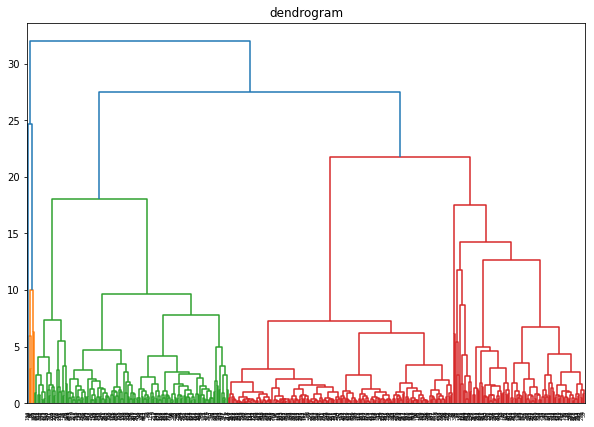

In [48]:

#HC Clustering

import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
plt.title("dendrogram")
dendro = sch.dendrogram(sch.linkage(file_scaled,method = 'ward'))


In [52]:
from sklearn.cluster import AgglomerativeClustering
clust = AgglomerativeClustering(n_clusters=2,affinity = "euclidean",linkage="ward")
y_clust = clust.fit_predict(file_scaled)
y_clust

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [54]:
print(silhouette_score(file_scaled,y_clust))

0.7924572758342273


In [100]:
#PCA

from sklearn.decomposition import PCA
pca = PCA(0.99)
pca.fit(file_scaled)
x_pca = pca.transform(file_scaled)

In [101]:
x_pca.shape

(440, 6)

In [102]:
pca.explained_variance_ratio_

array([0.44082893, 0.283764  , 0.12334413, 0.09395504, 0.04761272,
       0.01049519])

In [103]:
#kmeans Clustering 

from sklearn.cluster import KMeans
wcss = []
for i in range(1,20):
  kmeans = KMeans(n_clusters = i,init = "k-means++",random_state = 42)
  kmeans.fit(x_pca)
  wcss.append(kmeans.inertia_)

345.236540091805


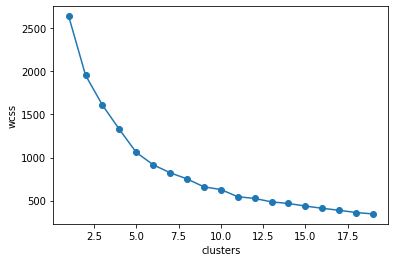

In [104]:
print(kmeans.inertia_)
plt.plot(range(1,20),wcss,'-o')
plt.xlabel("clusters")
plt.ylabel("wcss")
plt.show()

In [105]:
kmeans = KMeans(n_clusters=5,init = "k-means++",random_state = 42)
y_kmeans = kmeans.fit_predict(x_pca)

In [106]:
print(y_means)
print(silhouette_score(x_pca,y_means))

[3 1 1 3 0 3 3 3 3 1 1 3 0 1 1 3 1 3 3 3 3 3 0 1 1 3 3 3 1 0 3 3 3 0 3 1 0
 1 1 0 0 3 1 1 1 1 1 4 1 1 3 3 0 1 3 3 4 1 3 3 3 4 3 1 3 4 3 1 3 3 0 0 3 0
 3 3 3 1 3 3 3 1 1 3 3 4 4 0 3 0 3 3 4 0 1 3 3 3 3 3 1 1 3 0 3 3 1 1 3 1 3
 1 0 3 3 3 3 3 3 3 3 3 3 3 0 0 0 3 3 0 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 1 3 3
 3 0 3 3 3 3 3 1 1 3 3 1 1 3 3 1 3 1 1 3 3 3 1 1 3 1 3 1 0 3 3 3 3 0 1 2 3
 3 3 3 1 1 3 3 3 1 3 0 0 1 3 3 1 1 0 3 3 1 3 3 3 1 3 4 3 3 1 1 1 3 1 3 3 1
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 1 1 3 3 3 3 3 4 3 0 1 0 3 3 0
 0 3 3 3 3 1 1 1 3 1 3 3 3 3 0 3 3 0 0 3 3 3 3 0 0 0 0 3 3 3 0 3 3 3 1 3 3
 3 3 3 3 3 1 1 1 1 1 1 3 3 1 3 0 1 3 3 1 3 3 3 1 3 3 3 3 3 0 3 3 3 3 3 1 3
 4 0 0 3 3 3 3 1 1 3 1 3 3 1 0 3 1 3 1 3 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3
 0 0 3 3 3 3 1 0 3 3 0 0 0 3 1 3 3 3 3 3 3 3 3 0 3 3 1 3 3 3 3 0 3 3 3 3 0
 1 3 3 3 3 3 0 3 3 1 3 1 3 1 3 3 3 3 0 1 0 3 3 3 0 3 3 3 0 0 1 3 3]
0.3690403826812809


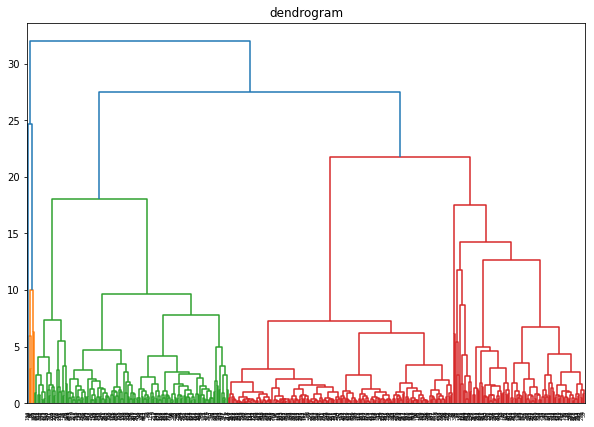

In [107]:

#HC Clustering

import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
plt.title("dendrogram")
dendro = sch.dendrogram(sch.linkage(x_pca,method = 'ward'))


In [108]:
from sklearn.cluster import AgglomerativeClustering
clust = AgglomerativeClustering(n_clusters=2,affinity = "euclidean",linkage="ward")
y_clust = clust.fit_predict(x_pca)
y_clust

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [109]:
print(silhouette_score(x_pca,y_clust))

0.7924572758342273
